# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 4: *ImageFeatureMaps*
Show feature maps of an image
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Tensor flow
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import plot_model

# In tensor flow images are numpy arrays
import numpy as np

# For load data
import pickle

# Module functions
from ImageUtilities import imageReadL, plotImageL, plotImageF

### Parameters:
    dataSetFileName = Name of the data file

In [2]:
dataSetFileName = "ShapesClassificationData.pickle"

### Load dataset

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter4/Input/")
with open(pathToDir+dataSetFileName, 'rb') as f:
     data = pickle.load(f)

trainImages, trainLabels, testImages, testLabels = data 

print(trainImages.shape, trainLabels.shape, testImages.shape, testLabels.shape)
print(trainLabels.shape[0])

trainLabels= tf.keras.utils.to_categorical(trainLabels)
testLabels= tf.keras.utils.to_categorical(testLabels)

# Number of classes
print(trainLabels.shape[1])

(1200, 32, 32) (1200,) (120, 32, 32) (120,)
1200
3


### Alternative mnist dataset

### Show an image from the dataset

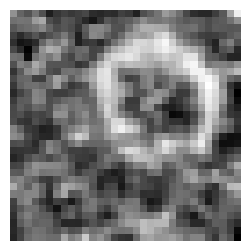

In [4]:
plotImageF(trainImages[1], figureSize = 3)

### Build the model

In [5]:
imageSize = trainImages.shape[1]

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(imageSize, imageSize, 1)))
model.add(layers.Conv2D(3,(3,3),activation='relu')) 
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(2,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(trainLabels.shape[1], activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 2)           │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 2)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 72)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           9,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │           8,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             243 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,653 (119.74 KB)

 Trainable params: 30,653 (119.74 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [6]:
trainImages2=trainImages.reshape(trainImages.shape[0],trainImages.shape[1],trainImages.shape[2],1)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainImages2,trainLabels,epochs=10, batch_size=32, verbose=1)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3789 - loss: 1.0837
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6311 - loss: 0.8742
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.4807
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8847 - loss: 0.3307
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9204 - loss: 0.2241
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9389 - loss: 0.1834
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9638 - loss: 0.1161
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9726 - loss: 0.0991
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9730 - loss: 0.0880
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9887 - loss: 0.0464


### Show convolution layers name

In [7]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

0 conv2d (None, 30, 30, 3)
2 conv2d_1 (None, 13, 13, 2)


### Show Feature Maps

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
(8, 13, 13, 2)


C:\Program Files\Pyton3.12.7\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


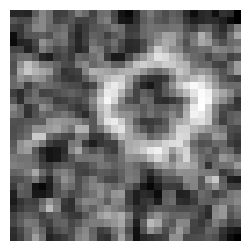

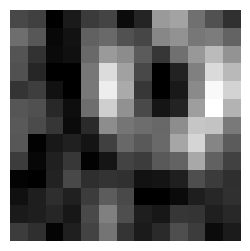

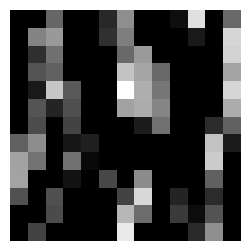

-------------------------------


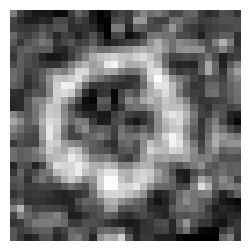

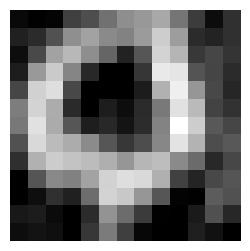

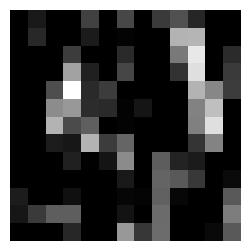

-------------------------------


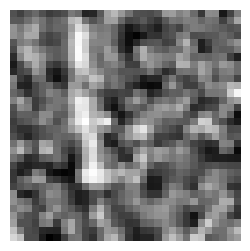

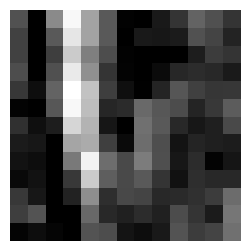

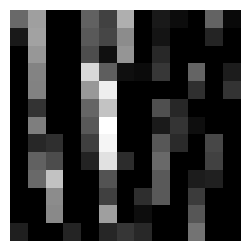

-------------------------------


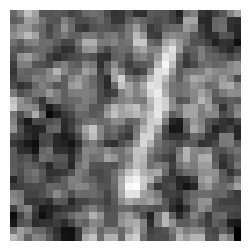

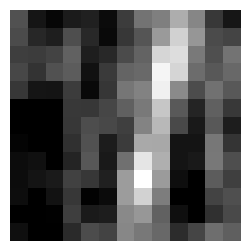

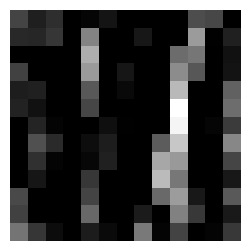

-------------------------------


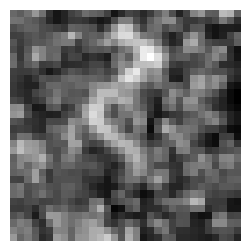

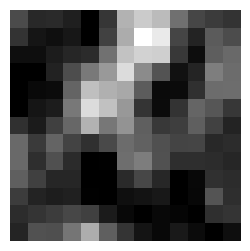

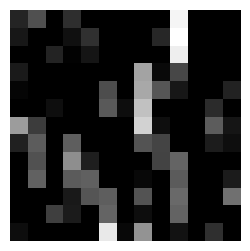

-------------------------------


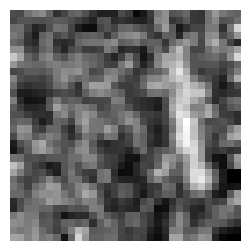

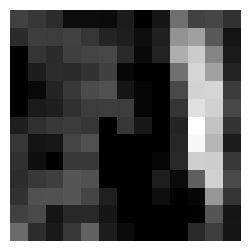

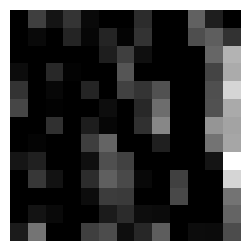

-------------------------------


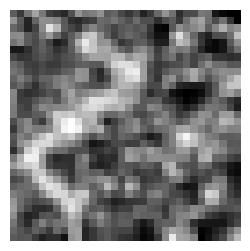

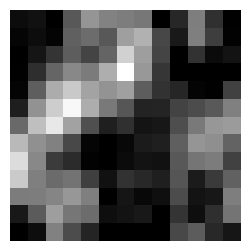

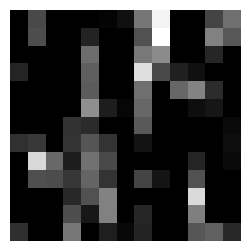

-------------------------------


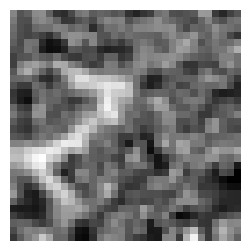

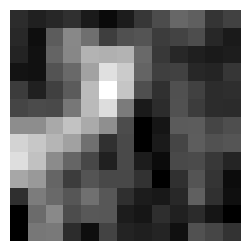

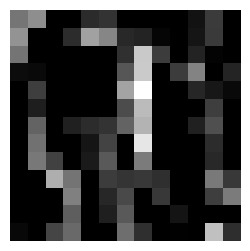

-------------------------------


In [8]:
# New model that is a subset of the layers 
newModel = tf.keras.Model(inputs=model.inputs , outputs=model.layers[2].output)

predictIndices = [2,3,4,5,6,7,8,9]
testImagestoPredic = []
for index in predictIndices:
    testImagestoPredic.append(testImages[index])

testImagestoPredic = np.array(testImagestoPredic)

testImagesPredict2=testImagestoPredic.reshape(testImagestoPredic.shape[0],testImagestoPredic.shape[1],testImagestoPredic.shape[2],1)

# Calculating features_map
features = newModel.predict(testImagesPredict2)

print (features.shape)

imageNum = 0;
for index in predictIndices:
    plotImageF(testImages[index], figureSize = 3)
    for featureMapNum in range(0,features.shape[3]):
        featureMap = features[imageNum][:, :, featureMapNum]
        plotImageF(featureMap, figureSize = 3)
    print ("-------------------------------")
    imageNum = imageNum + 1
